In [1]:
!pip install mglearn

In [2]:
#필요 라이브러리 임포트
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False

import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~~')

Unknown system... sorry~~~~~


In [3]:
train = pd.read_csv("./train.csv", index_col='PassengerId')

print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test = pd.read_csv("./test.csv", index_col="PassengerId")

print(test.shape)
test.head()

(418, 10)


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train.loc[train["Cabin"].isnull(), "Cabin"] = 0
train.loc[train["Age"].isnull(), "Age"] = 0
train.loc[train["Embarked"].isnull(), "Embarked"] = 0

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

train.loc[train["Sex"] == "male", "Sex"] = 0
train.loc[train["Sex"] == "female", "Sex"] = 1

train["Deck"] = train["Cabin"].str[:1]
train["Deck"].loc[(train['Cabin'] == 0) & (train['Pclass'] == 1)] = "B"
train["Deck"].loc[(train['Cabin'] == 0) & (train['Pclass'] == 2)] = "E"
train["Deck"].loc[(train['Cabin'] == 0) & (train['Pclass'] == 3)] = "F"

train["Deck"].loc[train['Deck'] == "A"] = 1
train["Deck"].loc[train['Deck'] == "B"] = 2
train["Deck"].loc[train['Deck'] == "C"] = 3
train["Deck"].loc[train['Deck'] == "D"] = 4
train["Deck"].loc[train['Deck'] == "E"] = 5
train["Deck"].loc[train['Deck'] == "F"] = 6
train["Deck"].loc[train['Deck'] == "G"] = 7
train["Deck"].loc[train['Deck'] == "T"] = 8

test.loc[test["Cabin"].isnull(), "Cabin"] = 0
test.loc[test["Age"].isnull(), "Age"] = 0
test.loc[test["Fare"].isnull(), "Fare"] = 0

test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

test.loc[test["Sex"] == "male", "Sex"] = 0
test.loc[test["Sex"] == "female", "Sex"] = 1

test["Deck"] = test["Cabin"].str[:1]
test["Deck"].loc[(test['Cabin'] == 0) & (test['Pclass'] == 1)] = "B"
test["Deck"].loc[(test['Cabin'] == 0) & (test['Pclass'] == 2)] = "E"
test["Deck"].loc[(test['Cabin'] == 0) & (test['Pclass'] == 3)] = "F"

test["Deck"].loc[test['Deck'] == "A"] = 1
test["Deck"].loc[test['Deck'] == "B"] = 2
test["Deck"].loc[test['Deck'] == "C"] = 3
test["Deck"].loc[test['Deck'] == "D"] = 4
test["Deck"].loc[test['Deck'] == "E"] = 5
test["Deck"].loc[test['Deck'] == "F"] = 6
test["Deck"].loc[test['Deck'] == "G"] = 7
test["Deck"].loc[test['Deck'] == "T"] = 8

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setit

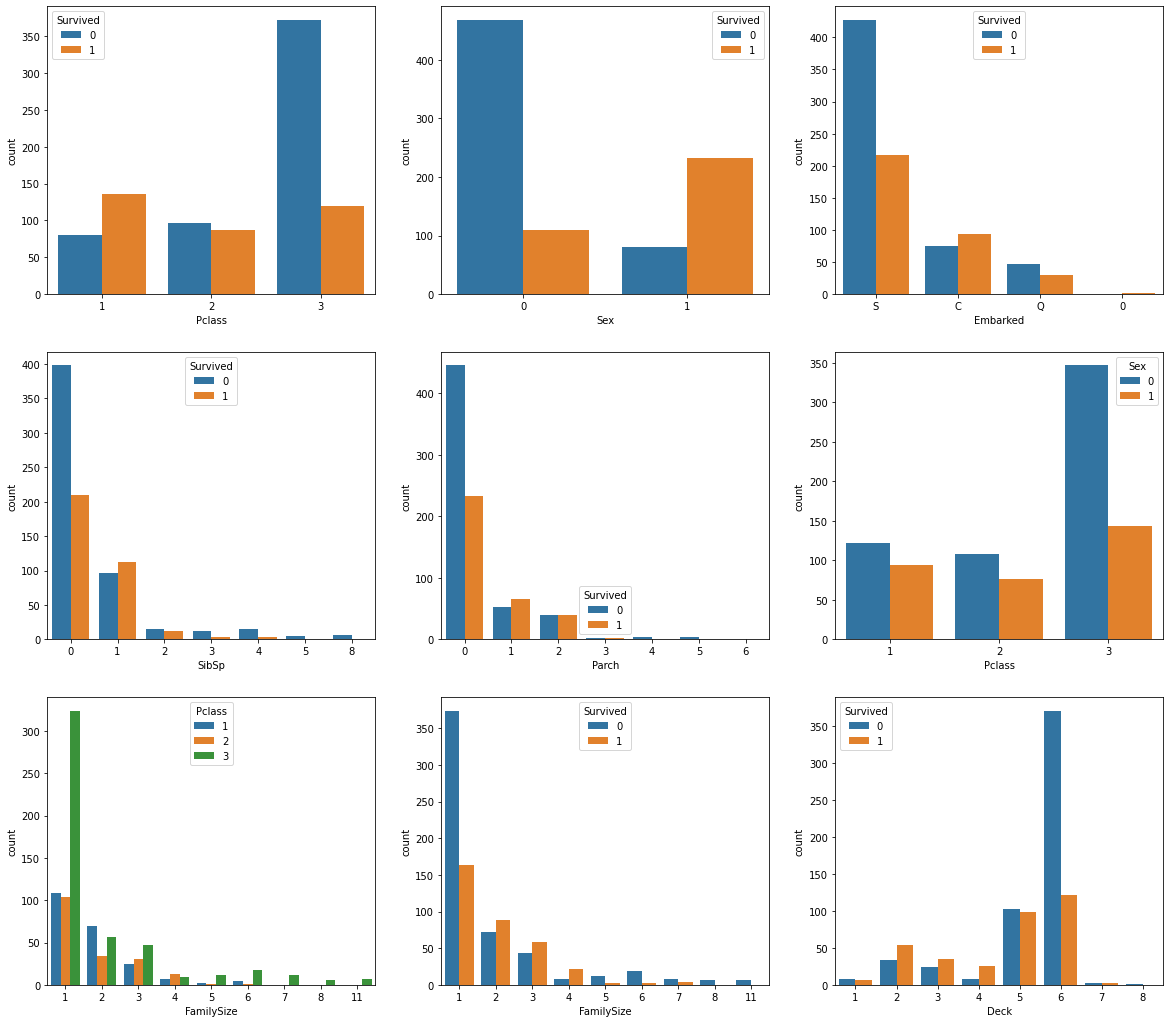

In [6]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(nrows=3, ncols=3)
# plt.tight_layout()

figure.set_size_inches(20, 18)

sns.countplot(data=train, x='Pclass', hue='Survived', ax=ax1)
sns.countplot(data=train, x='Sex', hue='Survived', ax=ax2)
sns.countplot(data=train, x='Embarked', hue='Survived', ax=ax3)
sns.countplot(data=train, x='SibSp', hue='Survived', ax=ax4)
sns.countplot(data=train, x='Parch', hue='Survived', ax=ax5)
sns.countplot(data=train, x='Pclass', hue='Sex', ax=ax6)
sns.countplot(data=train, x='FamilySize', hue='Pclass', ax=ax7)
sns.countplot(data=train, x='FamilySize', hue='Survived', ax=ax8)
sns.countplot(data=train, x='Deck', hue='Survived', ax=ax9)

In [7]:
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
FamilySize    0
Deck          0
dtype: int64

In [8]:
feature_names = ["Pclass", "Fare", "Sex", "Deck", "FamilySize"]
feature_names

['Pclass', 'Fare', 'Sex', 'Deck', 'FamilySize']

In [9]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 5)


,Pclass,Fare,Sex,Deck,FamilySize
PassengerId,,,,,
1,3,7.2500,0,6,2
2,1,71.2833,1,3,2
3,3,7.9250,1,6,1
4,1,53.1000,1,3,2
5,3,8.0500,0,6,1


In [10]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()
X_test.isnull().sum()

(418, 5)


Pclass        0
Fare          0
Sex           0
Deck          0
FamilySize    0
dtype: int64

In [11]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [12]:
X_train.head()

,Pclass,Fare,Sex,Deck,FamilySize
PassengerId,,,,,
1,3,7.2500,0,6,2
2,1,71.2833,1,3,2
3,3,7.9250,1,6,1
4,1,53.1000,1,3,2
5,3,8.0500,0,6,1


In [13]:
full_train_data = X_train.copy()
full_train_label = y_train.copy()
full_test_data   = X_test.copy()
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(full_train_data, full_train_label, random_state=0)

In [14]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=4)
forest.fit(X_train, y_train)
print("Training score : {:.3f}".format(forest.score(X_train, y_train)))
print("Test score : {:.3f}".format(forest.score(X_test, y_test)))

Training score : 0.925
Test score : 0.843
